# Washington D.C. Crime Statistics

This document analysizes DC Metro crime data collected from:
https://www.kaggle.com/vinchinzu/dc-metro-crime-data.

The data contains 342,867 reports of crime spanning from 2007-2017
    
Neighborhood cluster information was collected from:
https://www.neighborhoodinfodc.org/nclusters/nclusters.html  
    

## Data Setup

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
dc_crime_data = pd.read_csv('dc_crime_add_vars.csv')
cluster_map = pd.read_csv('cluster_map.csv')

### Overview of Raw Data

In [3]:
dc_crime_data.head()

,Unnamed: 0,X,REPORT_DAT,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,...,year,month,day,hour,minute,second,EW,NS,quad,crimetype
0,1,1,8/31/2008 8:47:00 PM,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,...,2008,8,31,20,47,0,West,North,Northwest,Non-Violent
1,2,2,9/1/2008 12:45:00 AM,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,...,2008,9,1,0,45,0,West,North,Northwest,Non-Violent
2,3,3,9/1/2008 3:00:00 AM,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,...,2008,9,1,3,0,0,East,North,Northeast,Non-Violent
3,4,4,9/9/2008 7:46:00 AM,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2.0,208.0,2,...,2008,9,9,7,46,0,West,North,Northwest,Non-Violent
4,5,5,8/24/2008 8:00:00 PM,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,1.0,102.0,2,...,2008,8,24,20,0,0,East,North,Northeast,Non-Violent


In [4]:
dc_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342867 entries, 0 to 342866
Data columns (total 32 columns):
Unnamed: 0              342867 non-null int64
X                       342867 non-null int64
REPORT_DAT              342867 non-null object
SHIFT                   342867 non-null object
OFFENSE                 342867 non-null object
METHOD                  342867 non-null object
BLOCK                   342867 non-null object
DISTRICT                342667 non-null float64
PSA                     342616 non-null float64
WARD                    342867 non-null int64
ANC                     342867 non-null object
NEIGHBORHOOD_CLUSTER    338162 non-null object
BLOCK_GROUP             341776 non-null object
CENSUS_TRACT            341776 non-null float64
VOTING_PRECINCT         342783 non-null object
CCN                     342867 non-null int64
START_DATE              342854 non-null object
END_DATE                331216 non-null object
XBLOCK                  342867 non-null floa

The cluster_map data can be used to identify which neighborhoods fall into each neighborhood cluster

In [5]:
cluster_map.head()

,NEIGHBORHOOD_CLUSTER,neighborhoods
0,0,unknown
1,1,"Kalorama Heights, Adams Morgan, Lanier Heights"
2,2,"Columbia Heights, Mt. Pleasant, Pleasant Plain..."
3,3,"Howard University, Le Droit Park, Cardozo/Shaw"
4,4,"Georgetown, Burleith/Hillandale"


In [6]:
pd.set_option('display.max_colwidth', -1)

In [7]:
cluster_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
NEIGHBORHOOD_CLUSTER    40 non-null int64
neighborhoods           40 non-null object
dtypes: int64(1), object(1)
memory usage: 720.0+ bytes


### Clean up the Data

In [8]:
cluster_map.rename(columns={"NEIGHBORHOOD_CLUSTER": "cluster"}, inplace=True)

In [9]:
dc_crime_data.drop(columns=['Unnamed: 0','X','REPORT_DAT','START_DATE','END_DATE', 'minute','second', 'CCN','BLOCK','WARD','optional', 'ANC','BLOCK_GROUP','CENSUS_TRACT'], inplace = True)

In [10]:
dc_crime_data.rename(columns={"NEIGHBORHOOD_CLUSTER": "cluster"}, inplace=True)

In [11]:
dc_crime_data['cluster'].fillna(0, inplace=True)

In [12]:
dc_crime_data['cluster'] = dc_crime_data['cluster'].astype(str)

In [13]:
dc_crime_data['cluster'] = dc_crime_data['cluster'].apply(lambda cluster: cluster.replace("Cluster",""))

In [14]:
dc_crime_data['cluster'] = pd.to_numeric(dc_crime_data['cluster'])

In [15]:
dc_crime_data['count'] = 1
dc_crime_data['violent'] = 0
dc_crime_data['non_violent'] = 0

In [16]:
dc_crime_data.loc[dc_crime_data.crimetype == "Non-Violent", "non_violent"] = 1
dc_crime_data.loc[dc_crime_data.crimetype == "Violent", "violent"] = 1

In [17]:
dc_crime_data = pd.merge(dc_crime_data,cluster_map,on='cluster')

## Overview Of Data

#### Crimes by Type of Offense

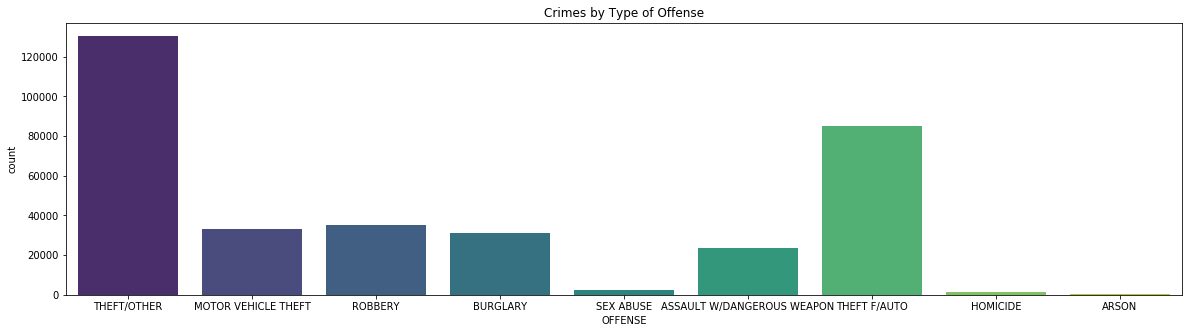

THEFT/OTHER                   130435
THEFT F/AUTO                  85287 
ROBBERY                       35267 
MOTOR VEHICLE THEFT           33188 
BURGLARY                      31292 
ASSAULT W/DANGEROUS WEAPON    23436 
SEX ABUSE                     2402  
HOMICIDE                      1234  
ARSON                         326   
Name: OFFENSE, dtype: int64

In [18]:
plt.figure(figsize=(20,5))
plt.title("Crimes by Type of Offense")
sns.countplot(x='OFFENSE',data=dc_crime_data,palette='viridis')
plt.show()
dc_crime_data['OFFENSE'].value_counts()

#### Crimes by Method

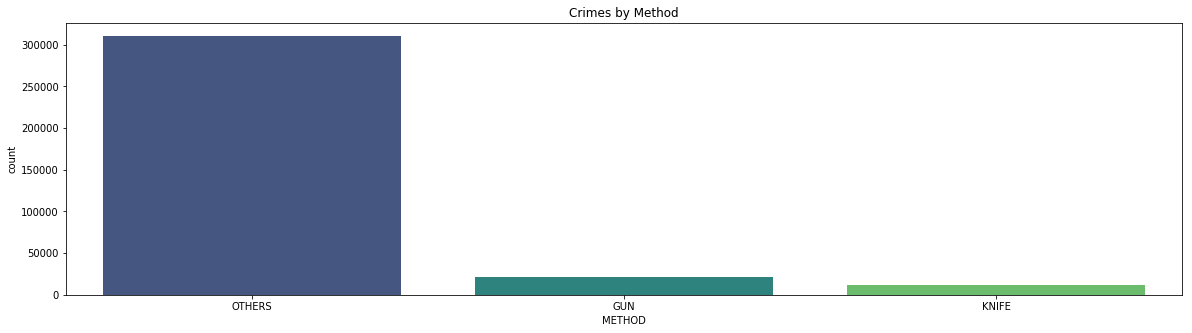

OTHERS    310658
GUN       20996 
KNIFE     11213 
Name: METHOD, dtype: int64

In [19]:
plt.figure(figsize=(20,5))
plt.title("Crimes by Method")
sns.countplot(x='METHOD',data=dc_crime_data,palette='viridis')
plt.show()
dc_crime_data['METHOD'].value_counts()

#### Crimes by Type of Crime

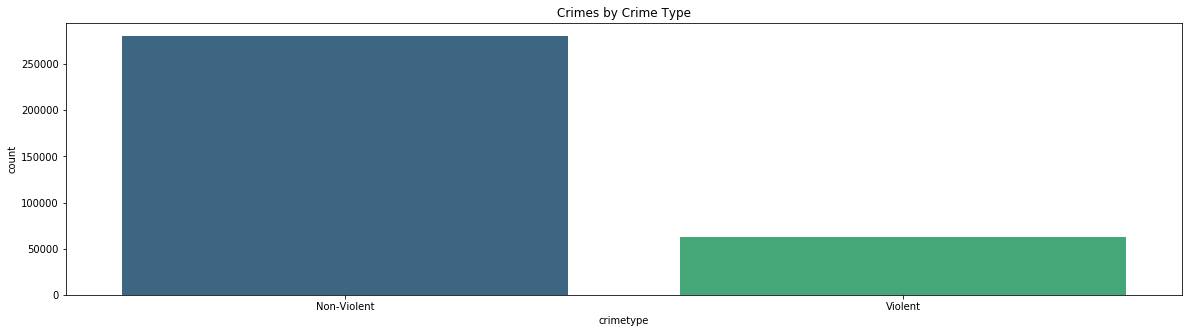

Non-Violent    280528
Violent        62339 
Name: crimetype, dtype: int64

In [20]:
plt.figure(figsize=(20,5))
plt.title("Crimes by Crime Type")
sns.countplot(x='crimetype',data=dc_crime_data,palette='viridis')
plt.show()
dc_crime_data['crimetype'].value_counts()

#### Crimes by Quadrant Location

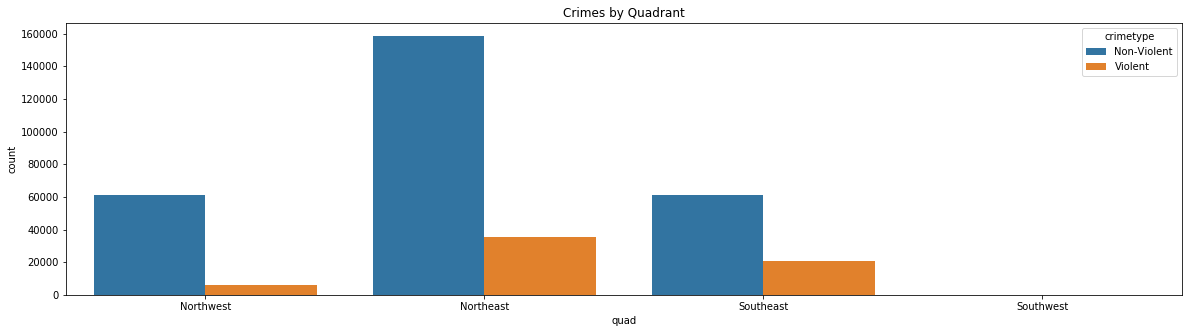

Northeast    194228
Southeast    81851 
Northwest    66773 
Southwest    15    
Name: quad, dtype: int64

In [21]:
plt.figure(figsize=(20,5))
plt.title("Crimes by Quadrant")
sns.countplot(x='quad',data=dc_crime_data, hue='crimetype')
plt.show()
dc_crime_data['quad'].value_counts()

The distribution of crimes by quadrant shows a majority of crimes occured in the Northeast while practically zero crimes occured in the Southwest.  While population is not represented in the data, it seems likely there is no population in the Southwest.  Looking at a map confirms this suspicion showing very little land in the Southwest quadrent of Washington DC.

It would be likely to find greater amounts of crime in areas with greater amounts of people.  However, population data is not avaiable in this dataset.  While the Northwest incures greater numbers of crime, one might be less likely to suffer from crime if the population is significantly larger.  In other words, in areas which have a greater population, it is more likely that the crime will happen to someone else.  

#### Percentage of crime which is Violent

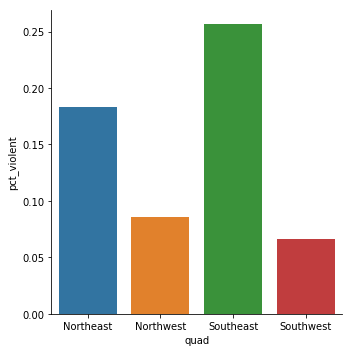

,quad,violent,non_violent,count,pct_violent
2,Southeast,20988,60863,81851,0.256417
0,Northeast,35650,158578,194228,0.183547
1,Northwest,5700,61073,66773,0.085364
3,Southwest,1,14,15,0.066667


In [22]:
quads = dc_crime_data.groupby(['quad']).agg({'violent':'sum', 'non_violent':'sum', 'count':'sum'})
quads['pct_violent'] = quads['violent'] / quads['count']
quads.reset_index(inplace=True)
sns.catplot(x='quad',y='pct_violent',data=quads,kind='bar')
plt.show()
quads.sort_values(by=['pct_violent'], ascending=False)

Areas with larger populations are expected to have larger counts of crime.  For instance, an area with twice as many people would be expected to have twice as much crime.  This means twice as much non-violent crime and twice as much violent crime.  

However, the ratio of violent to non-violent crime is disproportionate between quadrents. This data shows 25% of crime in the Southeast is violent, while only 18% of crime in the Northeast is violent.  This suggests the Southeast could be a more dangerous quadrant despite having less crime overal.  

#### Crime by Neighborhood Clusters

To view a geographical map of the clusters please visit:
https://www.neighborhoodinfodc.org/nclusters/nclusters.html

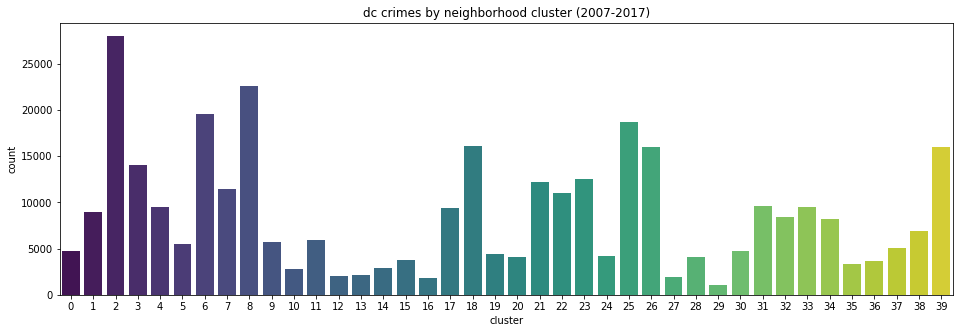

,cluster,neighborhoods
0,0,unknown
1,1,"Kalorama Heights, Adams Morgan, Lanier Heights"
2,2,"Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View"
3,3,"Howard University, Le Droit Park, Cardozo/Shaw"
4,4,"Georgetown, Burleith/Hillandale"
5,5,"West End, Foggy Bottom, GWU"
6,6,"Dupont Circle, Connecticut Avenue/K Street"
7,7,"Shaw, Logan Circle"
8,8,"Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street"
9,9,"Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point"


In [23]:
plt.figure(figsize=(16,5))
plt.title("dc crimes by neighborhood cluster (2007-2017)")
plt.xlabel('year')
plt.ylabel('crimes')
sns.countplot(x='cluster',data=dc_crime_data,palette='viridis')
plt.show()
cluster_map

## All D.C. Crime by Year

In [24]:
years = dc_crime_data.groupby(['year']).agg({'violent':'sum', 'non_violent':'sum', 'count':'sum'})
years['pct_violent'] = years['violent'] / years['count']
years.reset_index(inplace=True)
min_year_count = years['count'].min()
max_year_count = years['count'].max()

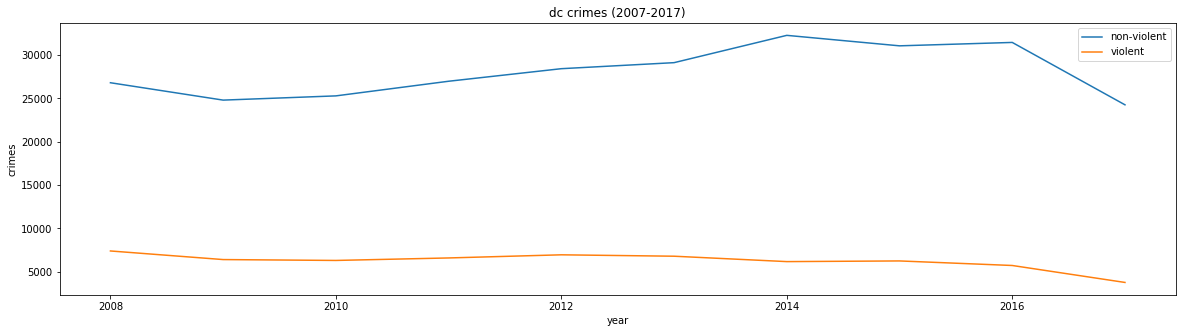

,year,violent,non_violent,count,pct_violent
0,2008,7397,26811,34208,0.216236
1,2009,6404,24806,31210,0.205191
2,2010,6303,25294,31597,0.199481
3,2011,6591,26983,33574,0.196313
4,2012,6953,28432,35385,0.196496
5,2013,6791,29128,35919,0.189064
6,2014,6169,32279,38448,0.160450
7,2015,6246,31070,37316,0.167381
8,2016,5721,31462,37183,0.153861
9,2017,3764,24263,28027,0.134299


In [25]:
plt.figure(figsize=(20,5))
plt.plot(years['year'], years['non_violent'], label='non-violent')
plt.plot(years['year'], years['violent'], label='violent')
plt.xlabel('year')
plt.ylabel('crimes')
plt.title("dc crimes (2007-2017)")
plt.legend()
plt.show()
years

The data suggest a dramatic decrease in crime from 2016 to 2017.  Because the data ends in 2017, it seems possible the data only includes 2017 up until the time the data was collected. If data has not been collected for the entire year of 2017 this would explain the dramatic dropoff in number of crimes.

In [26]:
pd.to_datetime(dc_crime_data[dc_crime_data['year'] == 2017]['date']).sort_values(ascending=False).head(5)

236658   2017-11-03 00:26:42
189027   2017-11-02 23:43:34
82227    2017-11-02 23:28:47
21036    2017-11-02 23:09:39
306773   2017-11-02 23:03:53
Name: date, dtype: datetime64[ns]

After filtering the data for 2017 and sorting by the date, the last 5 records show there are no records after November 3, 2017.  It would be reasonable to assume the 2017 data is missing after this date.

With two months missing from the 2017 data, 2017 cannont be compared to the other years, and will be removed for the remainder of this analysis when comparing data from year to year.  

In [27]:
dc_crime_data.drop(dc_crime_data[dc_crime_data.year == 2017].index, inplace=True)
years.drop(years[years.year == 2017].index, inplace=True)

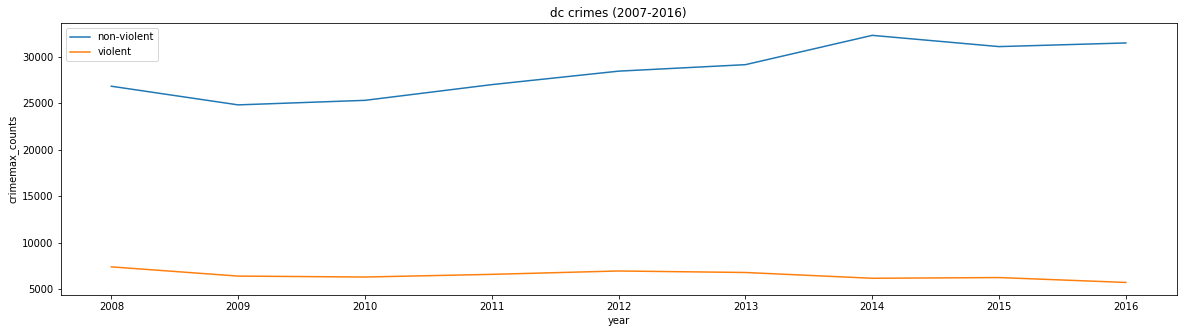

,year,violent,non_violent,count,pct_violent
0,2008,7397,26811,34208,0.216236
1,2009,6404,24806,31210,0.205191
2,2010,6303,25294,31597,0.199481
3,2011,6591,26983,33574,0.196313
4,2012,6953,28432,35385,0.196496
5,2013,6791,29128,35919,0.189064
6,2014,6169,32279,38448,0.160450
7,2015,6246,31070,37316,0.167381
8,2016,5721,31462,37183,0.153861


In [28]:
plt.figure(figsize=(20,5))
plt.plot(years['year'], years['non_violent'], label='non-violent')
plt.plot(years['year'], years['violent'], label='violent')
plt.xlabel('year')
plt.ylabel('crimemax_counts')
plt.title("dc crimes (2007-2016)")
plt.legend()
plt.show()
years

Removing 2017 from the data results in the above graph which now accuratly desribes the changes in crime from year to year

### Linear Regression of Crime 

While the graph above shows both increase and descreases in crime over the years, the trend appears to show non-violent crime is increasing while violent crime is remaining about the sime.  

Linear regression can be used to get a better idea of the overall trend in numbers

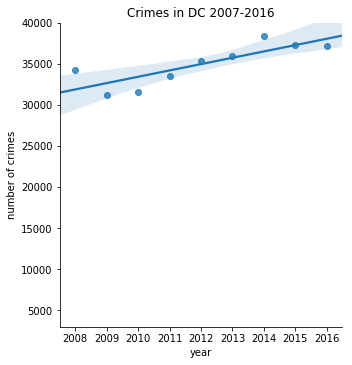

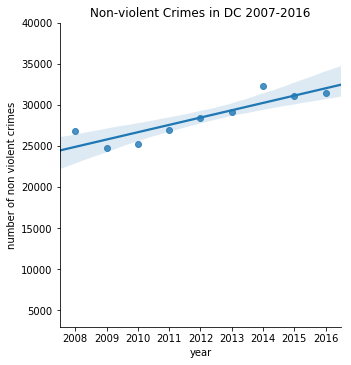

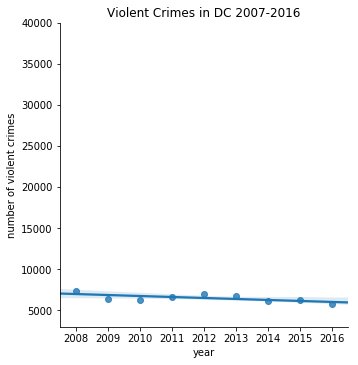

In [29]:
g = sns.lmplot(y='count', 
               x='year',
               data=years, # Data.
               fit_reg=True) # The regression line also includes a 95% confidence envelope.
g.set_ylabels("number of crimes")
g.set_xlabels("year")
g.set(ylim=(3000, 40000))
plt.title('Crimes in DC 2007-2016')

g = sns.lmplot(y='non_violent', 
               x='year',
               data=years, # Data.
               fit_reg=True) # The regression line also includes a 95% confidence envelope.
g.set_ylabels("number of non violent crimes")
g.set_xlabels("year")
g.set(ylim=(3000, 40000))
plt.title('Non-violent Crimes in DC 2007-2016')

g = sns.lmplot(y='violent', 
               x='year',
               data=years, # Data.
               fit_reg=True) # The regression line also includes a 95% confidence envelope.
g.set_ylabels("number of violent crimes")
g.set_xlabels("year")
g.set(ylim=(3000, 40000))
plt.title('Violent Crimes in DC 2007-2016')
plt.show()

While violent crimes look mostly flat,it does appear to be on a slight decline.  Calculating a t-score and p-value will suggest whether the change in crime between the early and later years is no more significant than the change in violent crimes between each year.  Alternativly, the change in crime from the early years to the later years could be significant enough to conclude that violent crime is decreasing significantly.

In [30]:
early_years_violent = years['violent'][:4]

In [31]:
later_years_violent = years['violent'][5:]

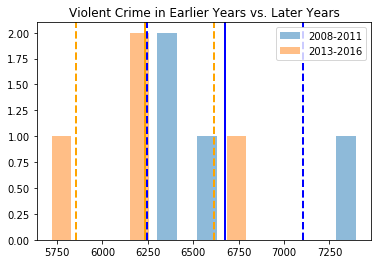

Mean violent crimes in the earlier years:  6673.75
Mean violent crimes in the later years:  6231.75
Difference between earlier and later year means:  442.0

Early years violent crime variance:  185039.6875
Later years violent crime variance:  144441.6875

Early years standard deviation:  430.16239665968016
Later years standard deviation:  380.0548480153884

t-value:  2.4174490454248163
p-value:  0.09438439089782091


In [32]:
early_years_violent_mean = early_years_violent.mean()
later_years_violent_mean = later_years_violent.mean()
diff =  early_years_violent_mean - later_years_violent_mean

early_years_violent_var = np.var(early_years_violent)
later_years_violent_var = np.var(later_years_violent)

early_years_violent_std = np.sqrt(early_years_violent_var)
later_years_violent_std = np.sqrt(later_years_violent_var)

plt.hist(early_years_violent, alpha=0.5, label='2008-2011') 
plt.hist(later_years_violent, alpha=0.5, label='2013-2016') 
plt.legend(loc='upper right') 
plt.title('Violent Crime in Earlier Years vs. Later Years')

# Add a vertical line at the mean.
plt.axvline(early_years_violent_mean, color='blue', linestyle='solid', linewidth=2)
plt.axvline(later_years_violent_mean, color='orange', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean.
plt.axvline(early_years_violent_mean + early_years_violent_std, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(later_years_violent_mean + later_years_violent_std, color='orange', linestyle='dashed', linewidth=2)

# Add a vertical line at one standard deviation below the mean.
plt.axvline(early_years_violent_mean - early_years_violent_std, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(later_years_violent_mean - later_years_violent_std, color='orange', linestyle='dashed', linewidth=2)

plt.show()

print('Mean violent crimes in the earlier years: ',early_years_violent_mean)
print('Mean violent crimes in the later years: ',later_years_violent_mean)
print('Difference between earlier and later year means: ',diff)

print('\nEarly years violent crime variance: ',early_years_violent_var)
print('Later years violent crime variance: ',later_years_violent_var)

print('\nEarly years standard deviation: ',early_years_violent_std)
print('Later years standard deviation: ',later_years_violent_std)

tval,pval=stats.ttest_rel(early_years_violent, later_years_violent)
print("\nt-value: ",tval)
print("p-value: ",pval)

The calculated t-value is 2.4.  This indicateds that the difference between the early years and the later years is about 2.x times the difference between the individual years.

However, the p-value is 0.09, meaning there is a 9% probability that the difference is due to the amount of noise and not because of any significant decrease in violent crime.

Therefore, violent crimes should be considered flat and not declining.

## Top 5 - Crime Data by Neighborhood

In [33]:
neigh_year = dc_crime_data.groupby(['cluster','neighborhoods', 'year']).agg({'violent':'sum', 'non_violent':'sum', 'count':'sum'})
neigh_year['pct_violent'] = neigh_year['violent'] / neigh_year['count']
neigh_year.rename(columns={"NEIGHBORHOOD_CLUSTER": "cluster", "year": "year", "violent": "total_violent", "non_violent": "total_non_violent", "count": "total_count", "pct_violent": "pct_violent"}, inplace=True)
neigh_year.reset_index(inplace=True)

min_neigh_year_count = (neigh_year['total_violent'].min()*.95)
max_neigh_year_count = (neigh_year['total_non_violent'].max()*1.05)

In [34]:
neigh_year_avg = neigh_year.groupby(['cluster','neighborhoods']).agg({'total_violent':'mean', 'total_non_violent':'mean', 'total_count':'mean'})
neigh_year_avg['pct_violent'] = neigh_year_avg['total_violent'] / neigh_year_avg['total_non_violent']
neigh_year_avg.rename(columns={"total_violent": "avg_violent", "total_non_violent": "avg_non_violent", "total_count": "avg_count", "pct_violent": "pct_violent"}, inplace=True)
neigh_year_avg.sort_values(by=['avg_count', 'avg_violent'], ascending=False)
neigh_year_avg.reset_index(inplace=True)

neigh_year_avg['2016-2008'] = 0
neigh_year_avg['2016-2008_pct'] = 0
for index, row in neigh_year_avg.iterrows():
    # find the neigh_year records for this cluster
    count08 = (neigh_year[(neigh_year['cluster'] == row['cluster']) & (neigh_year['year'] == 2010)]['total_count']).values
    count016 = (neigh_year[(neigh_year['cluster'] == row['cluster']) & (neigh_year['year'] == 2016)]['total_count']).values
    neigh_year_avg.loc[[index], ['2016-2008']] = count016 - count08
    neigh_year_avg.loc[[index], ['2016-2008_pct']] = count016/count08
    
neigh_year_avg['2016-2008_violent'] = 0
neigh_year_avg['2016-2008_violent_pct'] = 0
for index, row in neigh_year_avg.iterrows():
    # find the neigh_year records for this cluster
    count08 = (neigh_year[(neigh_year['cluster'] == row['cluster']) & (neigh_year['year'] == 2010)]['total_violent']).values
    count016 = (neigh_year[(neigh_year['cluster'] == row['cluster']) & (neigh_year['year'] == 2016)]['total_violent']).values
    neigh_year_avg.loc[[index], ['2016-2008_violent']] = count016 - count08
    neigh_year_avg.loc[[index], ['2016-2008_violent_pct']] = count016/count08

In [35]:
neigh_year_std = neigh_year.groupby(['cluster','neighborhoods']).agg({'total_violent':'std', 'total_non_violent':'std', 'total_count':'std'})
neigh_year_std.rename(columns={"total_violent": "violent_std", "total_non_violent": "non_violent_std", "total_count": "count_std"}, inplace=True)
neigh_year_std.sort_values(by=['count_std', 'violent_std'], ascending=False)
neigh_year_std.reset_index(inplace=True)


### top 5 neighborhood clusters with most average total crimes over the years

In [36]:
for index, row in neigh_year_avg.sort_values(by=['avg_count'], ascending=False).head(5).iterrows():
    print("Cluster: ",row['cluster'], neigh_year[neigh_year['cluster'] == row['cluster']]['neighborhoods'].head(1).values)

Cluster:  2 ['Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View']
Cluster:  8 ['Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street']
Cluster:  6 ['Dupont Circle, Connecticut Avenue/K Street']
Cluster:  25 ['NoMa, Union Station, Stanton Park, Kingman Park']
Cluster:  18 ['Brightwood Park, Crestwood, Petworth']


### top 5 neighborhood clusters with lowest average total crimes over the years

In [37]:
for index, row in neigh_year_avg.sort_values(by=['avg_count'], ascending=True).head(5).iterrows():
    print("Cluster: ",row['cluster'], neigh_year[neigh_year['cluster'] == row['cluster']]['neighborhoods'].head(1).values)

Cluster:  29 ['Eastland Gardens, Kenilworth']
Cluster:  27 ['Near Southeast, Navy Yard']
Cluster:  16 ['Colonial Village, Shepherd Park, North Portal Estates']
Cluster:  12 ['North Cleveland Park, Forest Hills, Van Ness']
Cluster:  13 ['Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir']


### top 5 neighborhood clusters with most violent crimes over the years

In [38]:
for index, row in neigh_year_avg.sort_values(by=['avg_violent'], ascending=False).head(5).iterrows():
    print("Cluster: ",row['cluster'], neigh_year[neigh_year['cluster'] == row['cluster']]['neighborhoods'].head(1).values)

Cluster:  2 ['Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View']
Cluster:  39 ['Congress Heights, Bellevue, Washington Highlands']
Cluster:  18 ['Brightwood Park, Crestwood, Petworth']
Cluster:  23 ['Ivy City, Arboretum, Trinidad, Carver Langston']
Cluster:  25 ['NoMa, Union Station, Stanton Park, Kingman Park']


### top 5 neighborhood clusters with highest percentage violent crimes over the years

In [39]:
for index, row in neigh_year_avg.sort_values(by=['pct_violent'], ascending=False).head(5).iterrows():
    print("Cluster: ",row['cluster'], neigh_year[neigh_year['cluster'] == row['cluster']]['neighborhoods'].head(1).values)

Cluster:  36 ['Woodland/Fort Stanton, Garfield Heights, Knox Hill']
Cluster:  37 ['Sheridan, Barry Farm, Buena Vista']
Cluster:  29 ['Eastland Gardens, Kenilworth']
Cluster:  38 ['Douglass, Shipley Terrace']
Cluster:  39 ['Congress Heights, Bellevue, Washington Highlands']


### top 5 neighborhood clusters with largest std of average crimes over the years

In [40]:
for index, row in neigh_year_std.sort_values(by=['count_std'], ascending=False).head(5).iterrows():
    print("Cluster: ",row['cluster'], neigh_year[neigh_year['cluster'] == row['cluster']]['neighborhoods'].head(1).values)

Cluster:  8 ['Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street']
Cluster:  2 ['Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View']
Cluster:  25 ['NoMa, Union Station, Stanton Park, Kingman Park']
Cluster:  3 ['Howard University, Le Droit Park, Cardozo/Shaw']
Cluster:  22 ['Brookland, Brentwood, Langdon']


### top 5 neighborhood clusters with smallest std of average crimes over the years

In [41]:
for index, row in neigh_year_std.sort_values(by=['count_std'], ascending=True).head(5).iterrows():
    print("Cluster: ",row['cluster'], neigh_year[neigh_year['cluster'] == row['cluster']]['neighborhoods'].head(1).values)

Cluster:  16 ['Colonial Village, Shepherd Park, North Portal Estates']
Cluster:  29 ['Eastland Gardens, Kenilworth']
Cluster:  12 ['North Cleveland Park, Forest Hills, Van Ness']
Cluster:  28 ['Historic Anacostia']
Cluster:  14 ['Cathedral Heights, McLean Gardens, Glover Park']


### top 5 neighborhood clusters with biggest increase of all crime

In [42]:
for index, row in neigh_year_avg.sort_values(by=['2016-2008'], ascending=False).head(5).iterrows():
    print("Cluster: ",row['cluster'], neigh_year[neigh_year['cluster'] == row['cluster']]['neighborhoods'].head(1).values)

Cluster:  8 ['Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street']
Cluster:  3 ['Howard University, Le Droit Park, Cardozo/Shaw']
Cluster:  7 ['Shaw, Logan Circle']
Cluster:  25 ['NoMa, Union Station, Stanton Park, Kingman Park']
Cluster:  26 ['Capitol Hill, Lincoln Park']


### top 5 neighborhood clusters with biggest decrease of all crime

In [43]:
for index, row in neigh_year_avg.sort_values(by=['2016-2008'], ascending=True).head(5).iterrows():
    print("Cluster: ",row['cluster'], neigh_year[neigh_year['cluster'] == row['cluster']]['neighborhoods'].head(1).values)

Cluster:  39 ['Congress Heights, Bellevue, Washington Highlands']
Cluster:  38 ['Douglass, Shipley Terrace']
Cluster:  18 ['Brightwood Park, Crestwood, Petworth']
Cluster:  14 ['Cathedral Heights, McLean Gardens, Glover Park']
Cluster:  31 ['Deanwood, Burrville, Grant Park, Lincoln Heights, Fairmont Heights']


### top 5 neighborhood clusters with biggest increase of violent crime

In [44]:
for index, row in neigh_year_avg.sort_values(by=['2016-2008_violent'], ascending=False).head(5).iterrows():
    print("Cluster: ",row['cluster'], neigh_year[neigh_year['cluster'] == row['cluster']]['neighborhoods'].head(1).values)

Cluster:  23 ['Ivy City, Arboretum, Trinidad, Carver Langston']
Cluster:  34 ['Twining, Fairlawn, Randle Highlands, Penn Branch, Fort Davis Park, Dupont Park']
Cluster:  22 ['Brookland, Brentwood, Langdon']
Cluster:  30 ['Mayfair, Hillbrook, Mahaning Heights']
Cluster:  32 ['River Terrace, Benning, Greenway, Fort Dupont']


In [45]:
neigh_year_avg.sort_values(by=['2016-2008_violent'], ascending=False).head(5)

,cluster,neighborhoods,avg_violent,avg_non_violent,avg_count,pct_violent,2016-2008,2016-2008_pct,2016-2008_violent,2016-2008_violent_pct
23,23,"Ivy City, Arboretum, Trinidad, Carver Langston",322.111111,941.000000,1263.111111,0.342307,335,1.317536,89,1.314488
34,34,"Twining, Fairlawn, Randle Highlands, Penn Branch, Fort Davis Park, Dupont Park",199.777778,640.111111,839.888889,0.312099,173,1.257058,67,1.489051
22,22,"Brookland, Brentwood, Langdon",195.888889,911.333333,1107.222222,0.214948,356,1.385699,44,1.275000
30,30,"Mayfair, Hillbrook, Mahaning Heights",140.000000,339.333333,479.333333,0.412574,100,1.226757,27,1.234783
32,32,"River Terrace, Benning, Greenway, Fort Dupont",237.000000,626.333333,863.333333,0.378393,112,1.144890,25,1.127551


### top 5 neighborhood clusters with biggest decrease of violent crime

In [46]:
for index, row in neigh_year_avg.sort_values(by=['2016-2008_violent'], ascending=True).head(5).iterrows():
    print("Cluster: ",row['cluster'], neigh_year[neigh_year['cluster'] == row['cluster']]['neighborhoods'].head(1).values)

Cluster:  18 ['Brightwood Park, Crestwood, Petworth']
Cluster:  2 ['Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View']
Cluster:  6 ['Dupont Circle, Connecticut Avenue/K Street']
Cluster:  3 ['Howard University, Le Droit Park, Cardozo/Shaw']
Cluster:  7 ['Shaw, Logan Circle']


### top 5 neighborhood clusters with biggest increase of crime percentage

In [47]:
for index, row in neigh_year_avg.sort_values(by=['2016-2008_pct'], ascending=False).head(5).iterrows():
    print("Cluster: ",row['cluster'], neigh_year[neigh_year['cluster'] == row['cluster']]['neighborhoods'].head(1).values)

Cluster:  27 ['Near Southeast, Navy Yard']
Cluster:  8 ['Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street']
Cluster:  3 ['Howard University, Le Droit Park, Cardozo/Shaw']
Cluster:  7 ['Shaw, Logan Circle']
Cluster:  9 ['Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point']


### top 5 neighborhood clusters with biggest decrease of crime percentage

In [48]:
for index, row in neigh_year_avg.sort_values(by=['2016-2008_pct'], ascending=True).head(5).iterrows():
    print("Cluster: ",row['cluster'], neigh_year[neigh_year['cluster'] == row['cluster']]['neighborhoods'].head(1).values)

Cluster:  12 ['North Cleveland Park, Forest Hills, Van Ness']
Cluster:  14 ['Cathedral Heights, McLean Gardens, Glover Park']
Cluster:  13 ['Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir']
Cluster:  29 ['Eastland Gardens, Kenilworth']
Cluster:  39 ['Congress Heights, Bellevue, Washington Highlands']


### top 5 neighborhood clusters with biggest increase of violent crime percentage

In [49]:
for index, row in neigh_year_avg.sort_values(by=['2016-2008_violent_pct'], ascending=False).head(5).iterrows():
    print("Cluster: ",row['cluster'], neigh_year[neigh_year['cluster'] == row['cluster']]['neighborhoods'].head(1).values)

Cluster:  27 ['Near Southeast, Navy Yard']
Cluster:  13 ['Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir']
Cluster:  34 ['Twining, Fairlawn, Randle Highlands, Penn Branch, Fort Davis Park, Dupont Park']
Cluster:  29 ['Eastland Gardens, Kenilworth']
Cluster:  10 ['Hawthorne, Barnaby Woods, Chevy Chase']


### top 5 neighborhood clusters with biggest decrease of violent crime percentage

In [50]:
for index, row in neigh_year_avg.sort_values(by=['2016-2008_violent_pct'], ascending=True).head(5).iterrows():
    print("Cluster: ",row['cluster'], neigh_year[neigh_year['cluster'] == row['cluster']]['neighborhoods'].head(1).values)

Cluster:  18 ['Brightwood Park, Crestwood, Petworth']
Cluster:  4 ['Georgetown, Burleith/Hillandale']
Cluster:  1 ['Kalorama Heights, Adams Morgan, Lanier Heights']
Cluster:  11 ['Friendship Heights, American University Park, Tenleytown']
Cluster:  15 ['Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace']


### all clusters

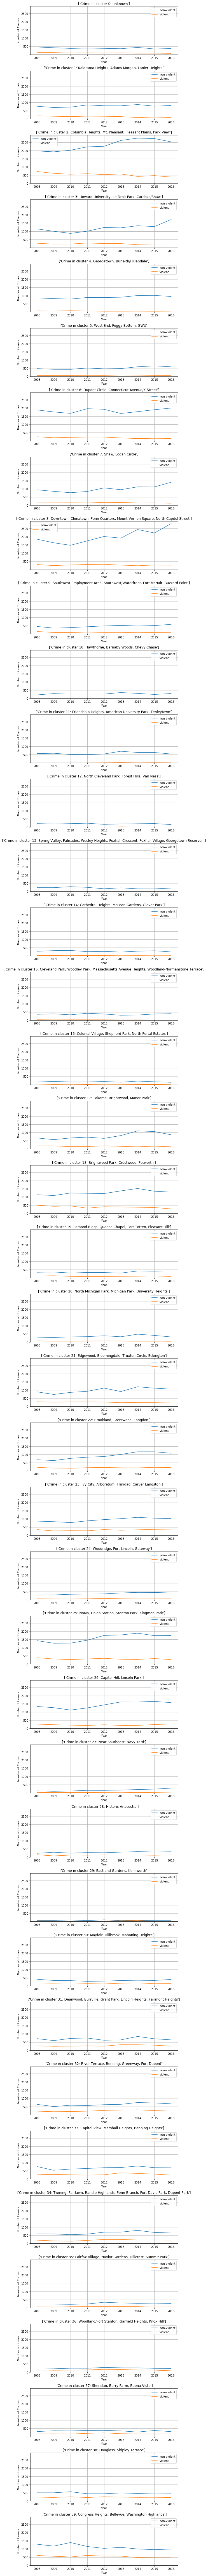

In [51]:
fig, axes = plt.subplots(40, 1, figsize=(10,128))

rating = 0

for index, row in neigh_year_avg.sort_values(by=['cluster'], ascending=True).head(40).iterrows():
    axes[rating].set_ylim([min_neigh_year_count,max_neigh_year_count])  
    axes[rating].set_xlabel('Year')
    axes[rating].set_ylabel('Number of Crimes')
    title = ("Crime in cluster " + str(row['cluster']) + ": " + (neigh_year[neigh_year['cluster'] == row['cluster']]['neighborhoods']).head(1).values)
    axes[rating].set_title(title)
    axes[rating].plot(neigh_year[neigh_year['cluster'] == row['cluster']]['year'], neigh_year[neigh_year['cluster'] == row['cluster']]['total_non_violent'], label="non-violent")
    axes[rating].plot(neigh_year[neigh_year['cluster'] == row['cluster']]['year'], neigh_year[neigh_year['cluster'] == row['cluster']]['total_violent'], label="violent")
    axes[rating].legend()
    axes[rating].grid(True)
    rating = rating+1

plt.tight_layout()

In [52]:
neigh_year[neigh_year['cluster'] == 15]

,cluster,neighborhoods,year,total_violent,total_non_violent,total_count,pct_violent
135,15,"Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace",2008,33,362,395,0.083544
136,15,"Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace",2009,25,387,412,0.060680
137,15,"Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace",2010,29,331,360,0.080556
138,15,"Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace",2011,29,426,455,0.063736
139,15,"Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace",2012,28,380,408,0.068627
140,15,"Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace",2013,21,305,326,0.064417
141,15,"Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace",2014,23,319,342,0.067251
142,15,"Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace",2015,18,381,399,0.045113
143,15,"Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace",2016,19,401,420,0.045238
